In [212]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
from copy import deepcopy
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [248]:
plt.style.use('ggplot')

In [41]:
PATH = r'C:\Users\PC\Desktop\stu\phon17_18\praat'
NA = '--undefined--'
CONS = [("к", "п'"), ("г", "л'"), ("∅", "й"), ("к", "т'"), ("г", "п'"), ("∅", "й"),
        ("г", "т'"), ("г", "й"), ("к", "л'"), ("к", "п'"), ("к", "т'"), ("г", "л'")]
HEADER = ['sound', 'sound_idx', 'segment', 'segment_idx', 'time', 'pitch', 'intensity', 'f1', 'f2']

In [155]:
_v = deepcopy(vs[-1])
#_l = vs[0].lines
#_l

In [156]:
_v.build()

In [157]:
d = _v.tr_atr

In [ ]:
def regress(X, y, normalize=False):
    """
    data: `st_atr` or `tr_atr`
    target: `f1` or `f2`
    """
    #if not data['time']:
         
    X = data['time'].reshape(-1, 1)
    y = data[target]
    
    lr = LinearRegression(normalize=normalize)
    
    lr.fit(X, y)
    
    
    

In [158]:
d

{'f1': array([632.09915541, 639.60266817, 642.01960714, 633.09830125,
        469.35888845]),
 'f2': array([1294.20035577, 1319.14740989, 1348.51455683, 1411.16975418,
        1468.18198081]),
 'intensity': array([80.42134097, 80.8633671 , 80.84432941, 80.07972817, 75.72271239]),
 'pitch': array([143.51739065, 148.46121662, 152.93882647, 155.86013354,
        156.46545714]),
 'time': array([192.97546953, 192.9938544 , 193.01223928, 193.03062415,
        193.0673939 ])}

In [166]:
lr = LinearRegression()

In [167]:
lr.fit(d['time'].reshape(-1, 1), d['f2']);

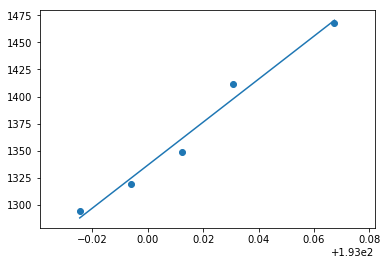

In [170]:
plt.scatter(d['time'], d['f2'])
plt.plot(d['time'], d['time'] * lr.coef_ + lr.intercept_)

In [169]:
lr.score(d['time'].reshape(-1, 1), d['f2'])

0.9793562834063719

In [ ]:
def regress(X, y, normalize=False):
    """
    data: `st_atr` or `tr_atr`
    target: `f1` or `f2`
    """
    #if not data['time']:
         
    X = data['time'].reshape(-1, 1)
    y = data[target]
    
    lr = LinearRegression(normalize=normalize)
    
    lr.fit(X, y)

In [283]:
class V:
    
    def __init__(self, rec, sound_idx, idx):
        """
        rec: номер записи
        sound_idx: индекс в текстгриде
        idx: порядковый номер гласного в тексте
        """
        self.rec = rec
        self.sound_idx = sound_idx
        self.idx = idx
         
        self.lines = list()
        self.info_line = 'sound=%s, prev=%s, next=%s, len=%s, status=%s'
        self.atrs = ['time', 'pitch', 'intensity', 'f1', 'f2']
        self.atr_idxs = [4, 5, 6, 7, 8]
        self.st_coef = dict()
        self.tr_coef = dict()
        self.sound_map = {'e': 'е',
                          'a': 'а',
                          'u': 'у'
                         }
        
    def __str__(self):
        return 'V(%s, %s)' % (self.rec, self.sound_idx)
            
    __repr__ = __str__
    
    def info(self):
        return self.info_line % (self.sound, self.prev, self.next,
                                 round(self.len, 2), self.status)
    
    def add_line(self, x):
        self.lines.append(x.strip())
        
    def to_int(self, line, idx):
        if NA in line.split(',')[idx]:
            return np.nan
        return int(line.split(',')[idx])
    
    def to_float(self, line, idx):
        if NA in line.split(',')[idx]:
            return np.nan
        return float(line.split(',')[idx])
    
    def get_status(self):
        """
        0: ok
        1: uncertain transition
        2: uncertain spectrum
        """
        x = self.lines[0].split(',')[0].strip() 
        if x[0] == '?':
            self.status = 1
        elif x[0] == '!':
            self.status = 2
        else:
            self.status = 0
    
    def get_sound(self):
        x = self.lines[0].split(',')[0].strip()
        x = x.replace('?', '').replace('!', '')
        self.sound = self.sound_map[x]
        
    def get_prev(self):
        self.prev = CONS[self.idx][0]
        
    def get_next(self):
        self.next = CONS[self.idx][1]
        
    def get_len(self):
        _len = self.to_float(self.lines[-1], 4) - self.to_float(self.lines[0], 4) 
        self.len = _len * 1000
    
    def build_st_atr(self):
        self.st_atr = {a: np.array([]) for a in self.atrs}
        
        for i in range(len(self.lines)):
            if self.lines[i].split(',')[2].strip() == 'st':
                for j, atr in enumerate(self.atrs):
                    #self.tr_atr[atr].append(self.to_float(self.lines[i], self.atr_idxs[j]))
                    self.st_atr[atr] = np.append(self.st_atr[atr], [self.to_float(self.lines[i], self.atr_idxs[j])])
            
    def build_tr_atr(self):
        self.tr_atr = {a: np.array([]) for a in self.atrs}
        
        for i in range(len(self.lines)):
            if self.lines[i].split(',')[2].strip() == 'tr':
                for j, atr in enumerate(self.atrs):
                    #self.tr_atr[atr].append(self.to_float(self.lines[i], self.atr_idxs[j]))
                    self.tr_atr[atr] = np.append(self.tr_atr[atr], [self.to_float(self.lines[i], self.atr_idxs[j])])
                    
    def mean(self, x, by):
        if by == 'st':
            return np.mean(self.st_atr[x])
        else:
            return np.mean(self.tr_atr[x])
        
    def std(self, x, by):
        if by == 'st':
            return np.std(self.st_atr[x])
        else:
            return np.std(self.tr_atr[x])
        
    def regress(self, X, y, normalize=False):
        """
        data: `st_atr` or `tr_atr`
        target: `f1` or `f2`
        """
        if not X.any():
            return None, None
        
        lr = LinearRegression(normalize=normalize)
        lr.fit(X, y)
        return lr.coef_, lr.intercept_
        
    def fit(self, target, by):
        """
        self.`st|tr`_coef = {target: [fitted coef_, fitted intercept_]}
        """
        if by == 'st':
            coef, intercept = self.regress(self.st_atr['time'].reshape(-1, 1), self.st_atr[target])
            self.st_coef[target] = [coef, intercept]
        else:
            coef, intercept = self.regress(self.tr_atr['time'].reshape(-1, 1), self.tr_atr[target])
            self.tr_coef[target] = [coef, intercept]
            
    def rmse(self, target, by):
        if by == 'st':
            score = mean_squared_error(self.st_atr[target],
                                       self.st_atr['time']  * self.st_coef[target][0] + self.st_coef[target][1])
            return round(np.sqrt(score), 4)
        else:
            score = mean_squared_error(self.tr_atr[target],
                                       self.tr_atr['time']  * self.tr_coef[target][0] + self.tr_coef[target][1])
            return round(np.sqrt(score), 4)
        
    def r2(self, target, by):
        if by == 'st':
            score = r2_score(self.st_atr[target],
                                       self.st_atr['time']  * self.st_coef[target][0] + self.st_coef[target][1])
            return round(score, 4)
        else:
            score = r2_score(self.tr_atr[target],
                                       self.tr_atr['time']  * self.tr_coef[target][0] + self.tr_coef[target][1])
            return round(score, 4)
            
    def plot_fit(self, target, by, target_style='scatter', ylabel=None, legend=True, fsize=(6, 4)):
        plt.figure(figsize=fsize)
        if by == 'st':
            if target_style == 'scatter':
                plt.scatter(self.st_atr['time'], self.st_atr[target], color='b', alpha=0.5)
                plt.plot(self.st_atr['time'], self.st_atr[target], color='b', alpha=0.45)
            else:
                plt.plot(self.st_atr['time'], self.st_atr[target], color='b', alpha=0.9)
            coef = self.st_coef[target][0]
            intercept = self.st_coef[target][1]
            plt.plot(self.st_atr['time'], self.st_atr['time'] * coef + intercept,
                     color='r', alpha=0.6)
        else:
            if target_style == 'scatter':
                plt.scatter(self.tr_atr['time'], self.tr_atr[target], color='b', alpha=0.5)
                plt.plot(self.tr_atr['time'], self.tr_atr[target], color='b', alpha=0.45)
            else:
                plt.plot(self.tr_atr['time'], self.tr_atr[target], color='b', alpha=0.9)
            coef = self.tr_coef[target][0]
            intercept = self.tr_coef[target][1]
            plt.plot(self.tr_atr['time'], self.tr_atr['time'] * coef + intercept,
                     color='r', alpha=0.6)
            
        if legend:
            _coef = 'coef = %s' % round(coef[0], 2)
            _intercept = 'intercept = %s' % round(intercept, 2)
            rmse = 'RMSE = %s' % self.rmse(target, by)
            r2 = 'R2 = %s' % self.r2(target, by)
            els = [Line2D([0], [0], color='w', label=_coef),
                   Line2D([0], [0], color='w', label=_intercept),
                   Line2D([0], [0], color='w', label=rmse),
                   Line2D([0], [0], color='w', label=r2)]
            plt.legend(handles=els, bbox_to_anchor=(1, 1))
        
        plt.title('%s' % self.info())
        plt.xlabel('Time, ms.')
        if ylabel is None:
            plt.ylabel(target)
        else:
            plt.ylabel(ylabel)
    
    def build(self):
        self.get_sound()
        self.get_status()
        self.get_prev()
        self.get_next()
        self.get_len()
        self.build_st_atr()
        self.build_tr_atr()
        self.fit('f1', 'st')
        self.fit('f2', 'st')
        self.fit('f1', 'tr')
        self.fit('f2', 'tr')
        

In [284]:
vs = read_csv('3')

In [285]:
_v = deepcopy(vs[-1])
_v.build()

In [286]:
_v.info()

"sound=а, prev=г, next=л', len=178.0, status=0"

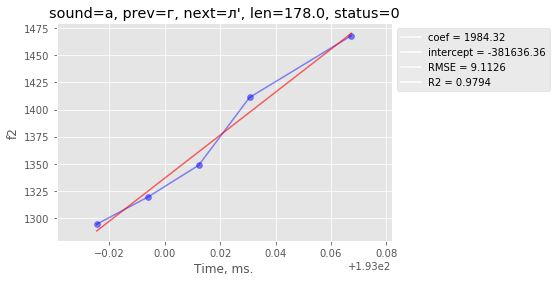

In [287]:
_v.plot_fit('f2', 'tr')

In [207]:
_v.std('f2', 'st')

48.466153861434634

In [125]:
def read_csv(sound_name):
    def get_sound_idx(line):
        return int(line.split(',')[1])
    
    cont = list()
    _idx = -1
    cnt = 0
    cV = None
    f = open('%s\%s.csv' % (PATH, sound_name), 'r', encoding='utf-8').readlines()[1:]
     
    for i, line in enumerate(f):
        c_idx = get_sound_idx(line)
        if c_idx != _idx:
            if cV is not None:
                cont.append(cV)
            cV = V(sound_name, c_idx, cnt)
            _idx = c_idx
            cnt += 1
        cV.add_line(line)
    
    # the last vowel
    cont.append(cV)
        
    return cont

In [154]:
vs = read_csv('3')

In [49]:
vs

[V(3, 2),
 V(3, 4),
 V(3, 6),
 V(3, 8),
 V(3, 10),
 V(3, 12),
 V(3, 14),
 V(3, 16),
 V(3, 18),
 V(3, 20),
 V(3, 22),
 V(3, 24)]

In [26]:
vs[0].lines

['?a, 2, st, 2, 21.098546051358344, --undefined--, 74.04784699796359, 780.7128247251602, 1785.0800489204034',
 '?a, 2, st, 2, 21.117913349849772, 126.84509272753431, 80.02664418359653, 738.7000905771761, 2323.69514271682',
 '?a, 2, st, 2, 21.1372806483412, 126.40436492825674, 83.07601331748558, 875.301108234363, 2525.307299462071',
 '?a, 2, st, 2, 21.156647946832628, 124.45821241072044, 84.25461695165832, 984.7231511375725, 2477.8641679074067',
 '?a, 2, st, 2, 21.195382543815477, 118.7396996792083, 85.01303914172488, 943.3685804258288, 2494.2865969511986',
 '?a, 2, tr, 3, 21.195382543815477, 118.7396996792083, 85.01303914172488, 943.3685804258288, 2494.2865969511986',
 '?a, 2, tr, 3, 21.206018513217938, 117.32776043831485, 84.67347150860823, 970.772707410967, 2494.820286977796',
 '?a, 2, tr, 3, 21.2166544826204, 115.77673199494662, 83.85291902163311, 962.4761556766317, 2388.5580006502737',
 '?a, 2, tr, 3, 21.22729045202286, 114.11919947205664, 82.28201107237678, 1126.9356457738588, 234